# Bitcoin Historical Data using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Bitcoin History.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%
...,...,...,...,...,...,...,...
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [3]:
df.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %
4945,"Jul 27, 2010",0.1,0.1,0.1,0.1,3.37K,0.00%
4946,"Jul 26, 2010",0.1,0.1,0.1,0.1,0.88K,0.00%
4947,"Jul 25, 2010",0.1,0.1,0.1,0.1,1.55K,0.00%
4948,"Jul 24, 2010",0.1,0.1,0.1,0.1,0.50K,0.00%
4949,"Jul 23, 2010",0.1,0.1,0.1,0.1,2.40K,0.00%
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%
4954,"Jul 18, 2010",0.1,0.0,0.1,0.1,0.08K,0.00%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4955 non-null   object
 1   Price     4955 non-null   object
 2   Open      4955 non-null   object
 3   High      4955 non-null   object
 4   Low       4955 non-null   object
 5   Vol.      4955 non-null   object
 6   Change %  4955 non-null   object
dtypes: object(7)
memory usage: 271.1+ KB


In [5]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Vol.'].unique()

array(['86.85K', '66.38K', '48.57K', ..., '0.58K', '0.57K', '0.08K'],
      dtype=object)

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

In [10]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-02-09,"47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,2024-02-08,"45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,2024-02-07,"44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,2024-02-06,"43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,2024-02-05,"42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%
...,...,...,...,...,...,...,...
4950,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
4951,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4952,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4953,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%


In [16]:
columns=['Price','Open','High','Low']

In [17]:
for i in df[columns]:
    df[i] = df[i].str.replace(',', '').astype(float)

In [18]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-02-09,47545.4,45293.3,47710.2,45254.2,86.85K,4.97%
1,2024-02-08,45293.3,44346.2,45579.2,44336.4,66.38K,2.15%
2,2024-02-07,44339.8,43088.4,44367.9,42783.5,48.57K,2.91%
3,2024-02-06,43087.7,42697.6,43375.5,42566.8,33.32K,0.91%
4,2024-02-05,42697.2,42581.4,43532.2,42272.5,39.26K,0.27%
...,...,...,...,...,...,...,...
4950,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
4951,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4952,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4953,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%


In [19]:
def convert_value(i):
    try:
        if 'K' in i:
            return float(i.replace('K',''))*1e3
        elif 'M' in i:
            return float(i.replace('M',''))*1e6
        elif 'B' in i:
            return float(i.replace('B',''))*1e9
        else:
            return i
    except ValueError:
        return np.nan

In [20]:
df['Vol.']=df['Vol.'].apply(convert_value)

In [21]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-02-09,47545.4,45293.3,47710.2,45254.2,86850.0,4.97%
1,2024-02-08,45293.3,44346.2,45579.2,44336.4,66380.0,2.15%
2,2024-02-07,44339.8,43088.4,44367.9,42783.5,48570.0,2.91%
3,2024-02-06,43087.7,42697.6,43375.5,42566.8,33320.0,0.91%
4,2024-02-05,42697.2,42581.4,43532.2,42272.5,39260.0,0.27%
...,...,...,...,...,...,...,...
4950,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00%
4951,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00%
4952,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00%
4953,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00%


In [22]:
df['Change %']=df['Change %'].str.rstrip('%').astype(float)/100

In [23]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-02-09,47545.4,45293.3,47710.2,45254.2,86850.0,0.0497
1,2024-02-08,45293.3,44346.2,45579.2,44336.4,66380.0,0.0215
2,2024-02-07,44339.8,43088.4,44367.9,42783.5,48570.0,0.0291
3,2024-02-06,43087.7,42697.6,43375.5,42566.8,33320.0,0.0091
4,2024-02-05,42697.2,42581.4,43532.2,42272.5,39260.0,0.0027
...,...,...,...,...,...,...,...
4950,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0000
4951,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0000
4952,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0000
4953,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0000


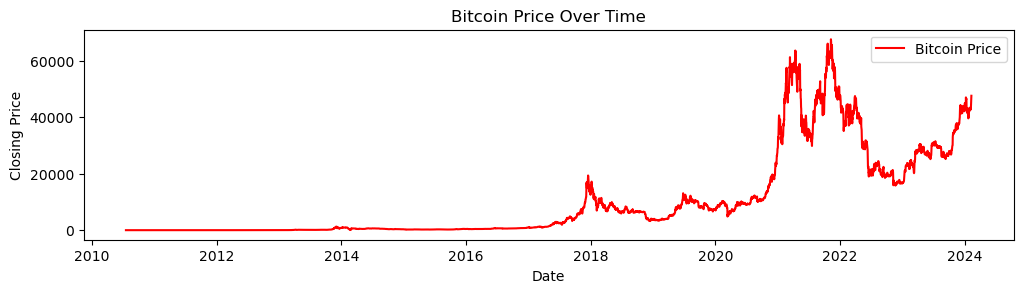

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Price'], label='Bitcoin Price', color='red')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

In [39]:
X = df['Open'].values.reshape(-1, 1)
y = df['Price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(X_test)

In [46]:
y_pred

array([2.91046465e+04, 8.95396633e+03, 3.17193700e+01, 1.57118625e+02,
       6.53568070e+03, 2.03535986e+04, 3.03122394e+04, 6.34988181e+03,
       6.54438065e+03, 1.48531313e+04, 4.29112645e+04, 2.55318041e+02,
       2.21194271e+01, 2.40194158e+01, 1.33194794e+01, 1.82194503e+01,
       6.47954344e+04, 4.47116901e+02, 7.08915344e+02, 4.15229727e+04,
       2.89193867e+01, 8.44566935e+03, 6.23615851e+02, 2.56194063e+01,
       5.81102741e+04, 8.55066873e+03, 4.33216983e+02, 1.31218779e+02,
       4.95016616e+02, 2.74717925e+02, 3.51117471e+02, 1.03218945e+02,
       4.77659116e+03, 4.70045401e+04, 1.82194503e+01, 6.01978377e+03,
       8.97416621e+03, 2.09690949e+04, 5.73921784e+04, 8.92190282e+01,
       4.41916931e+02, 6.68277983e+03, 4.77611356e+04, 5.73009789e+04,
       2.42194146e+01, 1.08490551e+04, 3.72572981e+04, 4.05839783e+04,
       1.43050345e+04, 1.19401246e+03, 6.44818122e+03, 4.88307293e+04,
       7.86687279e+03, 3.07193760e+01, 8.08317150e+03, 9.43876345e+03,
      

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
accuracy1=model.score(X_test,y_test)

In [51]:
accuracy1

0.9984517842517843

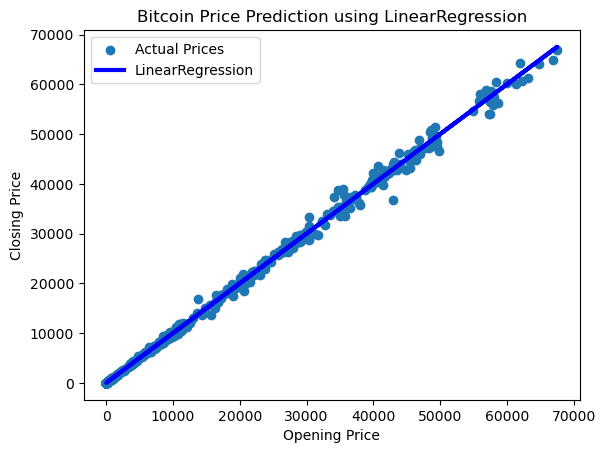

In [52]:
plt.scatter(X_test, y_test, label='Actual Prices')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='LinearRegression')
plt.title('Bitcoin Price Prediction using LinearRegression')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.legend()
plt.show()